In [139]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [140]:
import xgboost as xgb
print(xgb.__version__)

2.1.0


In [141]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, average_precision_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris
from xgboost import XGBClassifier

In [142]:
df = pd.read_csv("C:/Users/singh/Desktop/TIP_2/fraudTest.csv")   #C:/Users/singh/Downloads/fraudTrain.csv 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [143]:
#Display the data
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [144]:
#Summary the description of the dataset
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [145]:
#Distribute the class
df[('is_fraud')].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

# <font color ="006179"> Split Dataset

In [146]:
#Split the data into training and test sets using Stratified splitting
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

## Pre-Processing

In [147]:
# Convert 'trans_date_trans_time' to separate columns
X_train['trans_date'] = pd.to_datetime(X_train['trans_date_trans_time'],format='%d-%m-%Y %H:%M').dt.date
X_train['trans_time'] = pd.to_datetime(X_train['trans_date_trans_time'],format='%d-%m-%Y %H:%M').dt.time

# Convert 'trans_date_trans_time' to separate columns
X_test['trans_date'] = pd.to_datetime(X_test['trans_date_trans_time'], format='%d-%m-%Y %H:%M').dt.date
X_test['trans_time'] = pd.to_datetime(X_test['trans_date_trans_time'], format='%d-%m-%Y %H:%M').dt.time

# Remove 'Unnamed: 0' and 'trans_date_trans_time' columns
if 'Unnamed: 0' in X_train.columns:
    X_train.drop(columns=['Unnamed: 0'], inplace=True)
X_train.drop('trans_date_trans_time', axis=1, inplace=True)

# Apply similar transformations to the test data
if 'Unnamed: 0' in X_test.columns:
    X_test.drop(columns=['Unnamed: 0'], inplace=True)
X_test.drop('trans_date_trans_time', axis=1, inplace=True)


In [148]:
# Reorder columns to have 'trans_date' first and 'trans_time' second
columns = ['trans_date', 'trans_time'] + [col for col in X_train.columns if col not in ['trans_date', 'trans_time']]
X_train = X_train[columns]

X_test = X_test[columns]

From the dtype of the dataset, we still have some tasks to do with the dtype. First of all, trans_date needed to be transferred from object/string to datetime

In [152]:
# Convert 'dob' to datetime with the correct format
X_train['dob'] = pd.to_datetime(X_train['dob'], format='%d-%m-%Y')

# Convert 'trans_time' to datetime, assuming time-only format
X_train['trans_time'] = pd.to_datetime(X_train['trans_time'], format='%H:%M:%S').dt.time

# Convert 'trans_date' to datetime (assuming default format works)
X_train['trans_date'] = pd.to_datetime(X_train['trans_date'])

# Apply similar transformations to the test data
X_test['dob'] = pd.to_datetime(X_test['dob'], format='%d-%m-%Y')
X_test['trans_time'] = pd.to_datetime(X_test['trans_time'], format='%H:%M:%S').dt.time
X_test['trans_date'] = pd.to_datetime(X_test['trans_date'])

# Check the data types
print("\nData types of the columns in training set:")
print(X_train.dtypes)



Data types of the columns in training set:
trans_date    datetime64[ns]
trans_time            object
cc_num               float64
merchant              object
category              object
amt                  float64
first                 object
last                  object
gender                object
street                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop               int64
job                   object
dob           datetime64[ns]
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
dtype: object


In [153]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

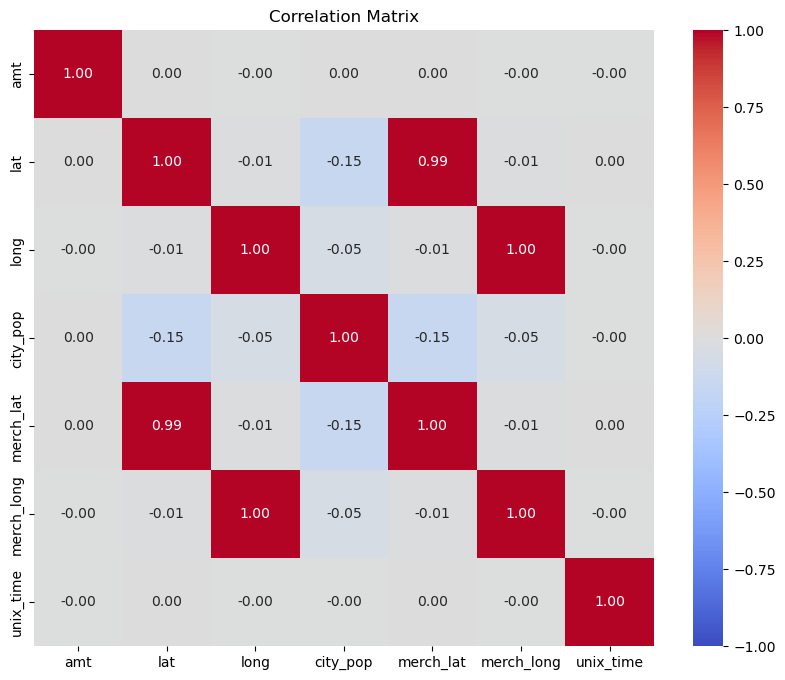

In [154]:
# Select numerical columns
numerical_columns_df = df[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time']]
# Compute the correlation matrix
correlation_matrix = numerical_columns_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

1. Transaction Frequency Features

In [155]:
# Compute the number of transactions per user in the training data
transactions_per_user_train = X_train['cc_num'].value_counts()

# Statistical summary of total transactions per user
stats_summary_train = transactions_per_user_train.agg(['mean', 'median', 'min', 'max'])
print("Statistical Summary of Total Transactions per User (Training Data):")
print(stats_summary_train)

# Compute the number of transactions per user in the test data
transactions_per_user_test = X_test['cc_num'].value_counts()

# Ensure the same aggregation is applied
# Adding this step to ensure proper transformation
stats_summary_test = transactions_per_user_test.agg(['mean', 'median', 'min', 'max'])
print("\nStatistical Summary of Total Transactions per User (Test Data):")
print(stats_summary_test)

Statistical Summary of Total Transactions per User (Training Data):
mean       430.313053
median     438.000000
min          2.000000
max       1522.000000
Name: count, dtype: float64

Statistical Summary of Total Transactions per User (Test Data):
mean      184.420354
median    184.000000
min         1.000000
max       622.000000
Name: count, dtype: float64


### <font color ="89CFF0"> 1.1 Create feature for total transactions per day per user

In [156]:
# Compute transactions per day for the training data
X_train['transactions_per_day'] = X_train.groupby(['cc_num', X_train['trans_date'].dt.date])['trans_date'].transform('count')

print("Training Data:")
print(X_train[['cc_num', 'trans_date', 'transactions_per_day']].head())

# Apply the same transformation to the test data
# To ensure consistency, we need to use the same groupings as in the training data
X_test['transactions_per_day'] = X_test.groupby(['cc_num', X_test['trans_date'].dt.date])['trans_date'].transform('count')

print("\nTest Data:")
print(X_test[['cc_num', 'trans_date', 'transactions_per_day']].head())


Training Data:
              cc_num trans_date  transactions_per_day
469756  1.800480e+14 2020-12-13                    11
351269  3.565940e+15 2020-11-03                     3
170889  5.596350e+15 2020-08-20                     4
414425  3.023500e+13 2020-11-30                     5
29086   4.451440e+15 2020-06-30                     1

Test Data:
              cc_num trans_date  transactions_per_day
207833  4.998110e+15 2020-09-01                     2
511867  4.670610e+15 2020-12-22                     1
494183  6.011680e+15 2020-12-18                     6
293910  2.131260e+14 2020-10-10                     1
193644  3.672140e+13 2020-08-28                     1


### <font color ="89CFF0"> 1.2 Create feature for total transactions per week per user

In [157]:
# Create 'Week' column
X_train['Week'] = X_train['trans_date'].dt.isocalendar().week

# Calculate total transactions per week for each customer
X_train['transaction_per_week'] = X_train.groupby(['cc_num', 'Week'])['trans_date'].transform('count')

# Display the updated training dataframe
print("Training Data:")
print(X_train[['cc_num', 'Week', 'transaction_per_week']].head())

# Apply the same transformations to the Test Data
# Create 'Week' column
X_test['Week'] = X_test['trans_date'].dt.isocalendar().week

# Calculate total transactions per week for each customer
X_test['transaction_per_week'] = X_test.groupby(['cc_num', 'Week'])['trans_date'].transform('count')

X_train['Week'] = X_train['Week'].astype(int)
X_test['Week'] = X_test['Week'].astype(int)

# Display the updated test dataframe
print("\nTest Data:")
print(X_test[['cc_num', 'Week', 'transaction_per_week']].head())

Training Data:
              cc_num  Week  transaction_per_week
469756  1.800480e+14    50                    53
351269  3.565940e+15    45                     5
170889  5.596350e+15    34                    20
414425  3.023500e+13    49                    37
29086   4.451440e+15    27                    13

Test Data:
              cc_num  Week  transaction_per_week
207833  4.998110e+15    36                    12
511867  4.670610e+15    52                     8
494183  6.011680e+15    51                    28
293910  2.131260e+14    41                     8
193644  3.672140e+13    35                     6


In [ ]:
# Calculate total transactions per month for the training data
total_transactions_per_month_train = X_train.groupby(X_train['trans_date'].dt.month).size()
# Calculate total transactions per month for the test data
total_transactions_per_month_test = X_test.groupby(X_test['trans_date'].dt.month).size()


### <font color ="89CFF0"> 1.3 Create feature for total transactions per month per user


In [158]:
# Compute total transactions per user per month in training data
X_train['transactions_per_month'] = X_train.groupby(['cc_num', X_train['trans_date'].dt.month])['trans_date'].transform('count')

# Display the result for training data
print("Training Data:")
print(X_train[['cc_num', 'trans_date', 'transactions_per_month']].head())

# Apply the same transformation to the test data
# Add 'transactions_per_month' to test data
X_test['transactions_per_month'] = X_test.groupby(['cc_num', X_test['trans_date'].dt.month])['trans_date'].transform('count')

# Display the result for test data
print("Test Data:")
print(X_test[['cc_num', 'trans_date', 'transactions_per_month']].head())

Training Data:
              cc_num trans_date  transactions_per_month
469756  1.800480e+14 2020-12-13                     225
351269  3.565940e+15 2020-11-03                      25
170889  5.596350e+15 2020-08-20                      72
414425  3.023500e+13 2020-11-30                      90
29086   4.451440e+15 2020-06-30                      18
Test Data:
              cc_num trans_date  transactions_per_month
207833  4.998110e+15 2020-09-01                      42
511867  4.670610e+15 2020-12-22                      28
494183  6.011680e+15 2020-12-18                      91
293910  2.131260e+14 2020-10-10                      27
193644  3.672140e+13 2020-08-28                      38


### <font color ="89CFF0"> 1.4 Create feature for total transactions per quarter (season) per user

In [159]:
# Define the season function
def season(date):
    if date.month in [1, 2, 3]:
        return 'Autumn'
    elif date.month in [4, 5, 6]:
        return 'Winter'
    elif date.month in [7, 8, 9]:
        return 'Spring'
    else:
        return 'Summer'

# Apply the season function to create a new column 'season'
X_train['season'] = X_train['trans_date'].apply(season)

# Calculate the number of transactions per season for each credit card number
X_train['transactions_per_season'] = X_train.groupby(['cc_num', 'season'])['trans_date'].transform('count')

# Display the updated training data
print(X_train)

# Apply the season function to create a new column 'season' in test data
X_test['season'] = X_test['trans_date'].apply(season)
X_test['transactions_per_season'] = X_test.groupby(['cc_num', 'season'])['trans_date'].transform('count')



       trans_date trans_time        cc_num  \
469756 2020-12-13   09:26:00  1.800480e+14   
351269 2020-11-03   15:59:00  3.565940e+15   
170889 2020-08-20   00:06:00  5.596350e+15   
414425 2020-11-30   18:51:00  3.023500e+13   
29086  2020-06-30   19:07:00  4.451440e+15   
...           ...        ...           ...   
425603 2020-12-03   02:07:00  4.010000e+15   
223907 2020-09-08   19:23:00  3.598300e+15   
536871 2020-12-28   00:18:00  4.807550e+12   
353653 2020-11-04   19:22:00  4.186530e+12   
456487 2020-12-09   19:24:00  4.450830e+15   

                                   merchant       category     amt     first  \
469756              fraud_Reynolds-Schinner       misc_pos   75.51      Mary   
351269                    fraud_Osinski Inc  personal_care    2.04     David   
170889         fraud_Feil, Hilpert and Koss    food_dining   62.19    Joseph   
414425                  fraud_Hills-Witting   shopping_net    9.05   Matthew   
29086   fraud_Nienow, Ankunding and Collier    

### <font color ="89CFF0"> 1.5 Create feature for which part of the day that transaction made


In [162]:
from datetime import datetime, time
from sklearn.preprocessing import LabelEncoder

# Define the function to map hours to parts of the day
def part_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

# Ensure trans_time is in the correct format
if isinstance(X_train['trans_time'].iloc[0], time):
    X_train['trans_time'] = X_train['trans_time'].apply(lambda x: datetime.combine(datetime.today(), x))
    X_test['trans_time'] = X_test['trans_time'].apply(lambda x: datetime.combine(datetime.today(), x))

# Extract hour from the trans_time column
X_train['hour'] = X_train['trans_time'].dt.hour
X_test['hour'] = X_test['trans_time'].dt.hour

# Apply the part_of_day function
X_train['part_of_day'] = X_train['hour'].apply(part_of_day)
X_test['part_of_day'] = X_test['hour'].apply(part_of_day)

# Drop the hour column if not needed
X_train = X_train.drop(columns=['hour'])
X_test = X_test.drop(columns=['hour'])

# Initialize the LabelEncoder for the part_of_day feature
part_of_day_encoder = LabelEncoder()

# Fit and transform on the training data
X_train['part_of_day'] = part_of_day_encoder.fit_transform(X_train['part_of_day'])

# Transform the test data using the fitted encoder
X_test['part_of_day'] = part_of_day_encoder.transform(X_test['part_of_day'])


2. User Transaction Behavior

In [163]:
# Compute aggregations for the training data
agg_df_train = X_train.groupby('cc_num')['amt'].agg(
    avg_trans_amount='mean',
    total_trans_amount='sum',
    med_trans_amount='median',
    std_trans_amount='std'
).reset_index()

# Merge aggregation results back to the training data
X_train = X_train.merge(agg_df_train, on='cc_num', how='left')

# Compute aggregations for the test data
# First, make sure the test data has the same cc_num values as in the training data
agg_df_test = X_test.groupby('cc_num')['amt'].agg(
    avg_trans_amount='mean',
    total_trans_amount='sum',
    med_trans_amount='median',
    std_trans_amount='std'
).reset_index()

# Merge aggregation results back to the test data
X_test = X_test.merge(agg_df_test, on='cc_num', how='left')

# Display the updated training and test data
print("Training Data with Aggregations:")
print(X_train)


Training Data with Aggregations:
       trans_date          trans_time        cc_num  \
0      2020-12-13 2024-08-11 09:26:00  1.800480e+14   
1      2020-11-03 2024-08-11 15:59:00  3.565940e+15   
2      2020-08-20 2024-08-11 00:06:00  5.596350e+15   
3      2020-11-30 2024-08-11 18:51:00  3.023500e+13   
4      2020-06-30 2024-08-11 19:07:00  4.451440e+15   
...           ...                 ...           ...   
388998 2020-12-03 2024-08-11 02:07:00  4.010000e+15   
388999 2020-09-08 2024-08-11 19:23:00  3.598300e+15   
389000 2020-12-28 2024-08-11 00:18:00  4.807550e+12   
389001 2020-11-04 2024-08-11 19:22:00  4.186530e+12   
389002 2020-12-09 2024-08-11 19:24:00  4.450830e+15   

                                   merchant       category     amt     first  \
0                   fraud_Reynolds-Schinner       misc_pos   75.51      Mary   
1                         fraud_Osinski Inc  personal_care    2.04     David   
2              fraud_Feil, Hilpert and Koss    food_dining   62.19

## 3. User-Based Features: Age and Gender

3.1 Calculate age of user based on DOB and transation date

In [164]:
#Calculate user's age based on date of birth and transaction date
def calculate_age(dob, trans_date):
    return trans_date.year - dob.year - ((trans_date.month, trans_date.day) < (dob.month, dob.day))

# Apply the function to calculate age in the training data
X_train['age'] = X_train.apply(lambda row: calculate_age(row['dob'], row['trans_date']), axis=1)

# Apply the function to calculate age in the test data
X_test['age'] = X_test.apply(lambda row: calculate_age(row['dob'], row['trans_date']), axis=1)

# Explore age statistics in the training data
age_stats = X_train['age'].agg(['mean', 'median', 'min', 'max'])
print("Age Statistics in Training Data:")
print(age_stats)

Age Statistics in Training Data:
mean      46.386902
median    44.000000
min       15.000000
max       96.000000
Name: age, dtype: float64


3.2 Convert gender into binary values

In [165]:
# Convert 'gender' to binary values: M -> 1, F -> 0
gender_mapping = {'M': 1, 'F': 0}
X_train['gender'] = X_train['gender'].map(gender_mapping)
X_test['gender'] = X_test['gender'].map(gender_mapping)

# Print the number of customers based on age (gender)
print('\n The number of customers based on gender is:')
print(X_train['gender'].value_counts())
print("-" * 40)

# Total transaction amount by gender in the training data
print('\nTotal transaction amount made by gender in training data is:')
print(X_train.groupby('gender')['amt'].sum())
print("-" * 40)

# If you need to calculate total transaction amount by gender in test data:
print('\nTotal transaction amount made by gender in test data is:')
print(X_test.groupby('gender')['amt'].sum())
print("-" * 40)


 The number of customers based on gender is:
gender
0    213212
1    175791
Name: count, dtype: int64
----------------------------------------

Total transaction amount made by gender in training data is:
gender
0    14780313.28
1    12227045.94
Name: amt, dtype: float64
----------------------------------------

Total transaction amount made by gender in test data is:
gender
0    6375392.27
1    5180151.62
Name: amt, dtype: float64
----------------------------------------


## 4. Fraud Transaction Analysis

4.1 Calculate fraud ratio using fraudulent transactions and total transactions

In [166]:
# Add 'is_fraud' to X_train for calculation purposes
X_train['is_fraud'] = y_train

# Calculate the fraud ratio efficiently
fraud_transactions_per_user = X_train.groupby('cc_num')['is_fraud'].sum().reset_index(name='fraud_transactions')
total_transactions_per_user = X_train.groupby('cc_num').size().reset_index(name='total_transactions')

# Merge to get fraud ratio per user
fraud_ratio_per_user = pd.merge(fraud_transactions_per_user, total_transactions_per_user, on='cc_num')
fraud_ratio_per_user['fraud_ratio'] = fraud_ratio_per_user['fraud_transactions'] / fraud_ratio_per_user['total_transactions']

# Rename columns to avoid conflicts
X_train = X_train.merge(fraud_ratio_per_user[['cc_num', 'fraud_ratio']], on='cc_num', how='left')

# Remove the 'is_fraud' column from X_train
X_train = X_train.drop(columns=['is_fraud'])

# Apply the same fraud_ratio transformation to the test data
# Initialize 'fraud_ratio' column with NaN
X_test = X_test.merge(fraud_ratio_per_user[['cc_num', 'fraud_ratio']], on='cc_num', how='left')

# Display the updated training and test data
print("Training Data:")
print(X_train)
print("\nTest Data:")
print(X_test)

Training Data:
       trans_date          trans_time        cc_num  \
0      2020-12-13 2024-08-11 09:26:00  1.800480e+14   
1      2020-11-03 2024-08-11 15:59:00  3.565940e+15   
2      2020-08-20 2024-08-11 00:06:00  5.596350e+15   
3      2020-11-30 2024-08-11 18:51:00  3.023500e+13   
4      2020-06-30 2024-08-11 19:07:00  4.451440e+15   
...           ...                 ...           ...   
388998 2020-12-03 2024-08-11 02:07:00  4.010000e+15   
388999 2020-09-08 2024-08-11 19:23:00  3.598300e+15   
389000 2020-12-28 2024-08-11 00:18:00  4.807550e+12   
389001 2020-11-04 2024-08-11 19:22:00  4.186530e+12   
389002 2020-12-09 2024-08-11 19:24:00  4.450830e+15   

                                   merchant       category     amt     first  \
0                   fraud_Reynolds-Schinner       misc_pos   75.51      Mary   
1                         fraud_Osinski Inc  personal_care    2.04     David   
2              fraud_Feil, Hilpert and Koss    food_dining   62.19    Joseph   
3   

## 5. Geography Analysis

5.1 Distance calculation using Haversine calculation

In [167]:
# Create the Haversine function using transaction longitude and latitude, also using merchant's longitude and latitude
def haversine(lat1, lon1, lat2, lon2):
    # Distance between latitudes and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0

    # Convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0

    # Apply formula
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
         math.cos(lat1) * math.cos(lat2))
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

# Apply the Haversine function to calculate 'distance_to_merch' for training data
X_train['distance_to_merch'] = X_train.apply(
    lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']),
    axis=1
)

# Apply the Haversine function to calculate 'distance_to_merch' for test data
X_test['distance_to_merch'] = X_test.apply(
    lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']),
    axis=1
)

5.2 Categorize type of cities based on the population

In [168]:
# Function to categorize city_pop
def categorize_population(population):
    if population < 1000:
        return 'Small'
    elif 1000 <= population <= 10000:
        return 'Medium'
    else:
        return 'Large'
#Apply the function to create a column called "pop_caregory" for train data
X_train['pop_cat'] = X_train['city_pop'].apply(categorize_population)
# Apply the fitted transform for test data
X_test['pop_cat'] = X_test['city_pop'].apply(categorize_population)


In [170]:
X_train.dtypes

trans_date                 datetime64[ns]
trans_time                 datetime64[ns]
cc_num                            float64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                              int64
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
transactions_per_day                int64
Week                              

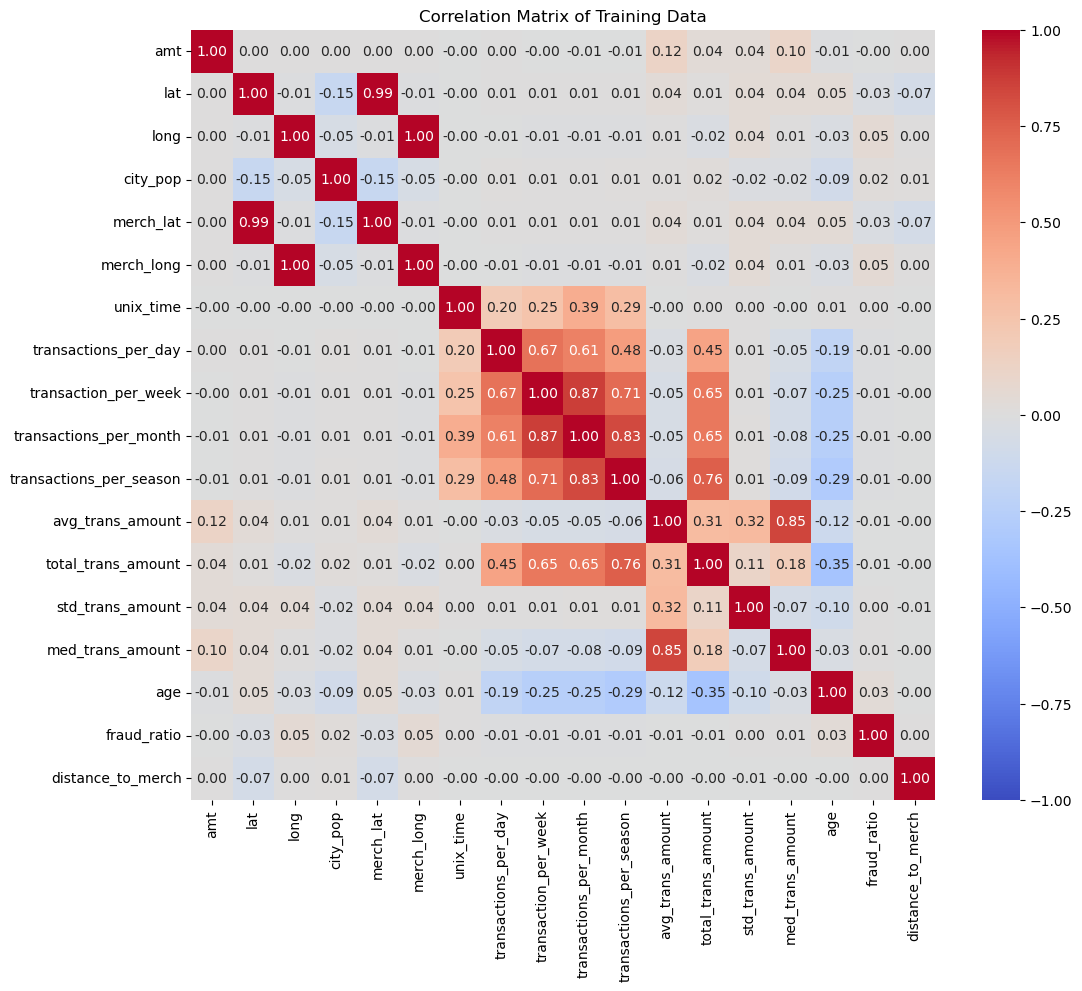

In [171]:
# Compute the correlation matrix for the training data
numerical_columns_train = X_train[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time', 'transactions_per_day', 'transaction_per_week', 'transactions_per_month', 'transactions_per_season', 'avg_trans_amount', 'total_trans_amount', 'std_trans_amount', 'med_trans_amount', 'age', 'fraud_ratio', 'distance_to_merch']]
correlation_matrix_train = numerical_columns_train.corr()

# Create a heatmap to visualize the correlation matrix for training data
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_train, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Training Data')
plt.show()

In [172]:
# Combine the training features and target variable into a single DataFrame
train_data = X_train.copy()
train_data['is_fraud'] = y_train

# Compute Pearson correlation coefficient for the specified features with 'is_fraud'
features = ['transactions_per_day', 'transaction_per_week', 'transactions_per_month','transactions_per_season','avg_trans_amount', 'total_trans_amount',
            'med_trans_amount', 'std_trans_amount', 'age', 'fraud_ratio',
            'distance_to_merch', 'is_fraud']

correlation = train_data[features].corr()['is_fraud']

# Print the Pearson correlation coefficients
print("Pearson correlation coefficients with 'is_fraud':")
print(correlation)

Pearson correlation coefficients with 'is_fraud':
transactions_per_day      -0.000504
transaction_per_week      -0.001163
transactions_per_month     0.000643
transactions_per_season    0.002330
avg_trans_amount          -0.000369
total_trans_amount        -0.000277
med_trans_amount           0.000383
std_trans_amount           0.000038
age                        0.001937
fraud_ratio                0.056369
distance_to_merch          0.001266
is_fraud                   1.000000
Name: is_fraud, dtype: float64


 ## <font color ="3fd8fe"> 3. Chi-Square Test for Categorical Features</font>

6.1 Chi-Square Test for Categorical Feature Independence with Fraud

In [173]:
#Combine X_train and y_train to get the complete training dataset for analysis
train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)

# List of categorical columns to test
categorical_cols = ['category', 'gender', 'city', 'state', 'Week', 'age', 'pop_cat','part_of_day']

# Loop through each categorical column and perform chi-square test
results = []
for col in categorical_cols:
    # Handle numerical columns separately for Chi-square test
    if train_data[col].dtype == 'object' or len(train_data[col].unique()) < 20:
        contingency_table = pd.crosstab(train_data[col], train_data['is_fraud'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        results.append({'Feature': col, 'Chi2': chi2, 'P-value': p})

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results)
print("Chi-square test results for categorical features and is_fraud in the training set:\n", results_df)

Chi-square test results for categorical features and is_fraud in the training set:
        Feature          Chi2        P-value
0     category   1250.095275  2.933560e-259
1       gender      0.181384   6.701862e-01
2         city  30102.966736   0.000000e+00
3        state    306.641765   5.578811e-39
4      pop_cat     37.942543   5.766091e-09
5  part_of_day   2071.221105   0.000000e+00


# <font color="006179"> Fuzzy Logic

In [174]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
def create_fuzzy_features(df):
    # Create fuzzy features

    # 1. Fuzzy transaction amount
    max_amt = df['amt'].max()
    amount = ctrl.Antecedent(np.arange(0, max_amt + 1, 1), 'amount')
    amount['low'] = fuzz.trimf(amount.universe, [0, 0, min(50, max_amt)])
    amount['medium'] = fuzz.trimf(amount.universe, [0, min(50, max_amt), min(100, max_amt)])
    amount['high'] = fuzz.trimf(amount.universe, [min(50, max_amt), min(100, max_amt), max_amt])

    df['fuzzy_amount_low'] = fuzz.interp_membership(amount.universe, amount['low'].mf, df['amt'])
    df['fuzzy_amount_medium'] = fuzz.interp_membership(amount.universe, amount['medium'].mf, df['amt'])
    df['fuzzy_amount_high'] = fuzz.interp_membership(amount.universe, amount['high'].mf, df['amt'])

    # 2. Fuzzy age
    max_age = df['age'].max()
    age = ctrl.Antecedent(np.arange(0, max_age + 1, 1), 'age')
    age['young'] = fuzz.trimf(age.universe, [0, 0, min(30, max_age)])
    age['middle'] = fuzz.trimf(age.universe, [20, min(40, max_age), min(60, max_age)])
    age['old'] = fuzz.trimf(age.universe, [min(50, max_age), max_age, max_age])

    df['fuzzy_age_young'] = fuzz.interp_membership(age.universe, age['young'].mf, df['age'])
    df['fuzzy_age_middle'] = fuzz.interp_membership(age.universe, age['middle'].mf, df['age'])
    df['fuzzy_age_old'] = fuzz.interp_membership(age.universe, age['old'].mf, df['age'])

    # 3. Fuzzy transaction frequency
    max_freq = df['transactions_per_season'].max()
    freq = ctrl.Antecedent(np.arange(0, max_freq + 1, 1), 'frequency')
    freq['low'] = fuzz.trimf(freq.universe, [0, 0, min(200, max_freq)])
    freq['medium'] = fuzz.trimf(freq.universe, [100, min(300, max_freq), min(500, max_freq)])
    freq['high'] = fuzz.trimf(freq.universe, [min(400, max_freq), max_freq, max_freq])

    df['fuzzy_freq_low'] = fuzz.interp_membership(freq.universe, freq['low'].mf, df['transactions_per_season'])
    df['fuzzy_freq_medium'] = fuzz.interp_membership(freq.universe, freq['medium'].mf, df['transactions_per_season'])
    df['fuzzy_freq_high'] = fuzz.interp_membership(freq.universe, freq['high'].mf, df['transactions_per_season'])

    # 4. Fuzzy fraud ratio
    max_fraud_ratio = df['fraud_ratio'].max()
    fraud_ratio = ctrl.Antecedent(np.arange(0, max_fraud_ratio + 0.001, 0.001), 'fraud_ratio')
    fraud_ratio['low'] = fuzz.trimf(fraud_ratio.universe, [0, 0, min(0.005, max_fraud_ratio)])
    fraud_ratio['medium'] = fuzz.trimf(fraud_ratio.universe, [0.001, min(0.005, max_fraud_ratio), min(0.01, max_fraud_ratio)])
    fraud_ratio['high'] = fuzz.trimf(fraud_ratio.universe, [min(0.005, max_fraud_ratio), max_fraud_ratio, max_fraud_ratio])

    df['fuzzy_fraud_ratio_low'] = fuzz.interp_membership(fraud_ratio.universe, fraud_ratio['low'].mf, df['fraud_ratio'])
    df['fuzzy_fraud_ratio_medium'] = fuzz.interp_membership(fraud_ratio.universe, fraud_ratio['medium'].mf, df['fraud_ratio'])
    df['fuzzy_fraud_ratio_high'] = fuzz.interp_membership(fraud_ratio.universe, fraud_ratio['high'].mf, df['fraud_ratio'])

    return df

# Apply the function to the training set
X_train = create_fuzzy_features(X_train.copy())
# Apply the function to the test set
X_test = create_fuzzy_features(X_test.copy())
# Display the first few rows of the new training DataFrame
print(X_train.head())

# List new fuzzy features
fuzzy_features = [col for col in X_train.columns if col.startswith('fuzzy_')]
print("\nNew fuzzy features:")
print(fuzzy_features)

  trans_date          trans_time        cc_num  \
0 2020-12-13 2024-08-11 09:26:00  1.800480e+14   
1 2020-11-03 2024-08-11 15:59:00  3.565940e+15   
2 2020-08-20 2024-08-11 00:06:00  5.596350e+15   
3 2020-11-30 2024-08-11 18:51:00  3.023500e+13   
4 2020-06-30 2024-08-11 19:07:00  4.451440e+15   

                              merchant       category     amt    first  \
0              fraud_Reynolds-Schinner       misc_pos   75.51     Mary   
1                    fraud_Osinski Inc  personal_care    2.04    David   
2         fraud_Feil, Hilpert and Koss    food_dining   62.19   Joseph   
3                  fraud_Hills-Witting   shopping_net    9.05  Matthew   
4  fraud_Nienow, Ankunding and Collier       misc_pos  306.65   Cheryl   

      last  gender                        street  ... fuzzy_amount_high  \
0     Wall       0               2481 Mills Lock  ...          0.510200   
1   Thomas       1       838 Dan Haven Suite 003  ...          0.000000   
2    Moody       1           

In [175]:
columns_to_drop = ['trans_date', 'trans_time', 'dob', 'first', 'last', 'street',
                   'trans_num', 'gender', 'zip', 'long', 'lat', 'job', 'unix_time',
                   'merchant', 'transaction_per_week', 'transactions_per_season',
                   'std_trans_amount', 'med_trans_amount', 'pop_cat']

#Drop specified column from X_train
X_train = X_train.drop(columns=columns_to_drop, errors ='ignore')
# Drop specified columns from X_test
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

# Initialize the LabelEncoder
season_encoder = LabelEncoder()
category_encoder = LabelEncoder()
city_encoder = LabelEncoder()
state_encoder = LabelEncoder()

# Fit on training data and transform training data
X_train['season'] = season_encoder.fit_transform(X_train['season'])
X_train['category'] = category_encoder.fit_transform(X_train['category'])
X_train['city'] = city_encoder.fit_transform(X_train['city'])
X_train['state'] = state_encoder.fit_transform(X_train['state'])

# Transform test data using the fitted encoders
X_test['season'] = season_encoder.transform(X_test['season'])
X_test['category'] = category_encoder.transform(X_test['category'])
X_test['city'] = city_encoder.transform(X_test['city'])
X_test['state'] = state_encoder.transform(X_test['state'])

# Display the transformed test set
print(X_test.head())

         cc_num  category    amt  city  state  city_pop  merch_lat  \
0  4.998110e+15        10  34.92   376     23    545147  39.958943   
1  4.670610e+15        12   8.89   178      9      5726  31.515695   
2  6.011680e+15         6  63.30   367     49       100  40.960301   
3  2.131260e+14        12  11.87    69     33       397  42.903115   
4  3.672140e+13        10  75.86   366     33      1666  43.462151   

   merch_long  transactions_per_day  Week  ...  fuzzy_amount_high  \
0  -94.392061                     2    36  ...             0.0000   
1  -84.375527                     1    52  ...             0.0000   
2 -105.437923                     6    51  ...             0.2660   
3  -73.584416                     1    41  ...             0.0000   
4  -74.510998                     1    35  ...             0.5172   

   fuzzy_age_young  fuzzy_age_middle  fuzzy_age_old  fuzzy_freq_low  \
0              0.0               0.6       0.000000           0.375   
1              0.0    

# <font color="006179">Standardize the training dataset</font>

In [176]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

7. Resampling dataset

In [177]:
columns_to_drop = ['trans_date', 'trans_time', 'dob', 'first', 'last', 'street',
                   'trans_num', 'gender', 'zip', 'long', 'lat', 'job', 'unix_time',
                   'merchant', 'transaction_per_week', 'transactions_per_season',
                   'std_trans_amount', 'med_trans_amount', 'pop_cat']

#Drop specified column from X_train
X_train = X_train.drop(columns=columns_to_drop, errors ='ignore')
# Drop specified columns from X_test
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

# Initialize the LabelEncoder
season_encoder = LabelEncoder()
category_encoder = LabelEncoder()
city_encoder = LabelEncoder()
state_encoder = LabelEncoder()

# Fit on training data and transform training data
X_train['season'] = season_encoder.fit_transform(X_train['season'])
X_train['category'] = category_encoder.fit_transform(X_train['category'])
X_train['city'] = city_encoder.fit_transform(X_train['city'])
X_train['state'] = state_encoder.fit_transform(X_train['state'])

# Transform test data using the fitted encoders
X_test['season'] = season_encoder.transform(X_test['season'])
X_test['category'] = category_encoder.transform(X_test['category'])
X_test['city'] = city_encoder.transform(X_test['city'])
X_test['state'] = state_encoder.transform(X_test['state'])

# Display the transformed test set
print(X_test.head())

         cc_num  category    amt  city  state  city_pop  merch_lat  \
0  4.998110e+15        10  34.92   376     23    545147  39.958943   
1  4.670610e+15        12   8.89   178      9      5726  31.515695   
2  6.011680e+15         6  63.30   367     49       100  40.960301   
3  2.131260e+14        12  11.87    69     33       397  42.903115   
4  3.672140e+13        10  75.86   366     33      1666  43.462151   

   merch_long  transactions_per_day  Week  ...  fuzzy_amount_high  \
0  -94.392061                     2    36  ...             0.0000   
1  -84.375527                     1    52  ...             0.0000   
2 -105.437923                     6    51  ...             0.2660   
3  -73.584416                     1    41  ...             0.0000   
4  -74.510998                     1    35  ...             0.5172   

   fuzzy_age_young  fuzzy_age_middle  fuzzy_age_old  fuzzy_freq_low  \
0              0.0               0.6       0.000000           0.375   
1              0.0    

## Scaling

In [182]:
print(X_test.dtypes)

cc_num                      float64
category                      int64
amt                         float64
city                          int64
state                         int64
city_pop                      int64
merch_lat                   float64
merch_long                  float64
transactions_per_day          int64
Week                          int32
transactions_per_month        int64
season                        int64
part_of_day                   int32
avg_trans_amount            float64
total_trans_amount          float64
age                           int64
fraud_ratio                 float64
distance_to_merch           float64
fuzzy_amount_low            float64
fuzzy_amount_medium         float64
fuzzy_amount_high           float64
fuzzy_age_young             float64
fuzzy_age_middle            float64
fuzzy_age_old               float64
fuzzy_freq_low              float64
fuzzy_freq_medium           float64
fuzzy_freq_high             float64
fuzzy_fraud_ratio_low       

In [183]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import FileLink

# Assuming df is the balanced dataset
# Step 1: Split the balanced data into features (X) and target (y)
X = X_test.drop(columns=['is_fraud'])
y = X_test['is_fraud']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Load the previously saved model
best_xgb = joblib.load('Main_model.joblib')  # Use the correct filename of your saved model

# Step 4: Make predictions on the scaled test data
y_pred = best_xgb.predict(X_test_scaled)
y_pred_proba = best_xgb.predict_proba(X_test_scaled)[:, 1]  # Get predicted probabilities for ROC curve

# Print the classification report
print("Classification Report on the test dataset:")
classification_report_str = classification_report(y_test, y_pred)
print(classification_report_str)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix on the test dataset:")
print(conf_matrix)

# Convert the classification report to a dataframe for easy manipulation
classification_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

# Create a dataframe for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Create a dataframe for the ROC curve
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': thresholds})

# Save the results to separate CSV files
conf_matrix_csv_filename = 'confusion_matrix.csv'
roc_curve_csv_filename = 'roc_curve.csv'
classification_report_csv_filename = 'classification_report.csv'

try:
    # Save confusion matrix to CSV
    conf_matrix_df.to_csv(conf_matrix_csv_filename, index=True)

    # Save ROC curve data to CSV
    roc_df.to_csv(roc_curve_csv_filename, index=False)

    # Save classification report to CSV
    classification_report_df.to_csv(classification_report_csv_filename)

except PermissionError as e:
    print(f"PermissionError: {e}. Please check if the file is open or if you have write permissions.")

# Visualization of the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Code to download the CSV files (works in Jupyter notebooks)
print(f"\nDownload the confusion matrix CSV file: {conf_matrix_csv_filename}")
print(f"Download the ROC curve CSV file: {roc_curve_csv_filename}")
print(f"Download the classification report CSV file: {classification_report_csv_filename}")

FileLink(conf_matrix_csv_filename)
FileLink(roc_curve_csv_filename)
FileLink(classification_report_csv_filename)



ValueError: could not convert string to float: '09-08-2020 11:30'

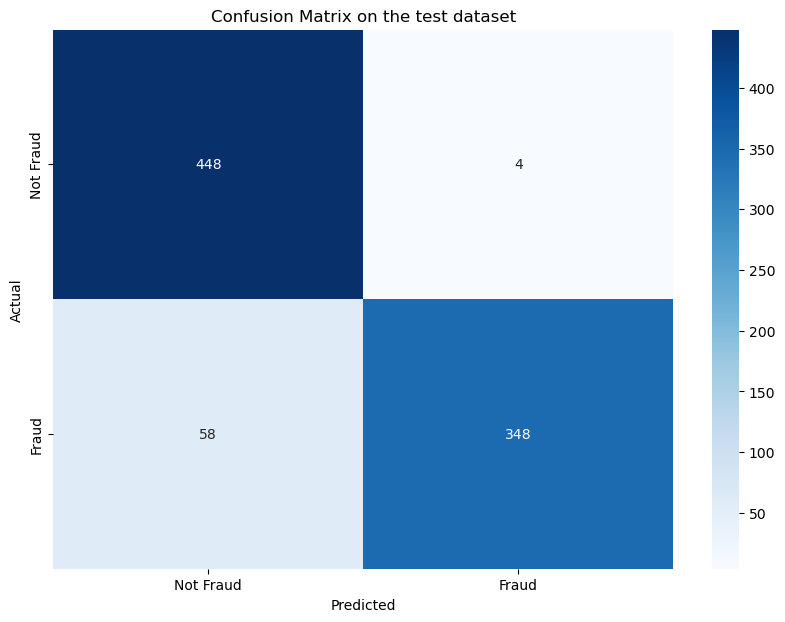


Model accuracy on the test dataset: 0.9277389277389277


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on the test dataset')
plt.show()
# Print the accuracy of the model on the test dataset
accuracy = accuracy_score(y_test, y_pred)
print("\nModel accuracy on the test dataset:", accuracy)